In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [2]:
IMAGE_PATH = 'picture.jpg'
FONT_PATH = 'arial.ttf'
#IMAGE_PATH = 'surf.jpeg'

In [3]:
reader = easyocr.Reader(['en', 'vi'],  gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[413, 41], [1067, 41], [1067, 105], [413, 105]],
  'CỘNG HÒA XÃ HỘl CHỦ NGHĨA VIỆT NAM',
  0.8950370295552088),
 ([[565, 93], [671, 93], [671, 133], [565, 133]],
  'Độc lậP',
  0.5445140400866627),
 ([[683, 95], [769, 95], [769, 131], [683, 131]], 'Iydo', 0.8837419152259827),
 ([[781, 97], [927, 97], [927, 137], [781, 137]],
  'Hanh phúc',
  0.978487004137243),
 ([[514, 129], [973, 129], [973, 172], [514, 172]],
  'SOCIALIST REPUBLIC OF VIET NAM',
  0.828148612628889),
 ([[523, 159], [694, 159], [694, 192], [523, 192]],
  'Independence',
  0.9999196438472727),
 ([[707, 159], [967, 159], [967, 207], [707, 207]],
  'Freedom _ Happiness',
  0.8547907169648927),
 ([[420, 208], [1072, 208], [1072, 280], [420, 280]],
  'CĂN CƯỚC CÔNG DÂN',
  0.9929652121714824),
 ([[418, 295], [715, 295], [715, 340], [418, 340]],
  'Citizen Identity Card',
  0.7730745790182515),
 ([[421, 371], [554, 371], [554, 415], [421, 415]],
  'Số/ No::',
  0.8623466456692959),
 ([[575, 361], [1025, 361], [1025, 429]

In [60]:
# Vẽ bằng cv2 -> không hỗ trợ tiếng Việt
# top_left = tuple(result[0][0][0])
# bottom_right = tuple(result[0][0][2])
# text = result[0][1]
# font = cv2.FONT_HERSHEY_SIMPLEX

In [61]:
# Box 1 dòng
# img = cv2.imread(IMAGE_PATH)
# img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
# img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
# plt.imshow(img)
# plt.show()

In [62]:
# Box nhiều dòng -> không hỗ trợ tiếng Việt
# img = cv2.imread(IMAGE_PATH)
# spacer = 100
# for detection in result: 
#     top_left = tuple(map(int, detection[0][0]))
#     bottom_right = tuple(map(int, detection[0][2]))
#     text = detection[1]
#     font=cv2.FONT_HERSHEY_SIMPLEX
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15

# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

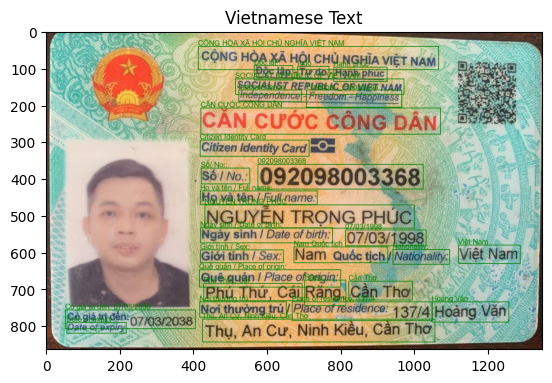

In [64]:
# Dùng với pillow hỗ trợ tiếng Việt

img_cv = cv2.imread(IMAGE_PATH)

# Chuyển đổi từ BGR (OpenCV) sang RGB (Pillow)
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Chuyển đổi từ NumPy sang Pillow
img_pil = Image.fromarray(img_rgb)

# Tạo đối tượng ImageDraw
draw = ImageDraw.Draw(img_pil)

# Tải font
font_size = 20  # Thay đổi kích thước font nếu cần
font = ImageFont.truetype(FONT_PATH, font_size)

for detection in result:
    bbox = detection[0]  # Lấy bounding box
    text = detection[1]  # Lấy văn bản
    top_left = (bbox[0][0], bbox[0][1])
    bottom_right = (bbox[2][0], bbox[2][1])

    # Vẽ hình chữ nhật xung quanh văn bản
    draw.rectangle([top_left, bottom_right], outline="green", width=2)
    
    # Vẽ văn bản
    draw.text((top_left[0], top_left[1] - font_size), text, font=font, fill="green")

# Chuyển đổi trở lại từ Pillow sang OpenCV (nếu cần)
img_rgb_with_text = np.array(img_pil)
img_bgr_with_text = cv2.cvtColor(img_rgb_with_text, cv2.COLOR_RGB2BGR)

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(img_bgr_with_text, cv2.COLOR_BGR2RGB))
plt.title('Vietnamese Text')
plt.show()